The MIT License (MIT)<br>
Copyright (c) 2017 Massachusetts Institute of Technology<br>

Author: Cody Rude<br>
This software has been created in projects supported by the US National<br>
Science Foundation and NASA (PI: Pankratius)<br>

Permission is hereby granted, free of charge, to any person obtaining a copy<br>
of this software and associated documentation files (the "Software"), to deal<br>
in the Software without restriction, including without limitation the rights<br>
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell<br>
copies of the Software, and to permit persons to whom the Software is<br>
furnished to do so, subject to the following conditions:<br>

The above copyright notice and this permission notice shall be included in<br>
all copies or substantial portions of the Software.<br>
THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR<br>
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,<br>
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE<br>
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER<br>
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,<br>
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN<br>
THE SOFTWARE.<br>

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150
from skimage.measure import block_reduce
import numpy as np

Import data fetcher

In [3]:
from skdaccess.geo.uavsar.cache import DataFetcher

Provide data URLs

In [4]:
slc_url_list = [
    'http://downloaduav2.jpl.nasa.gov/Release22/SanAnd_23511_01/SanAnd_23511_14068_001_140529_L090HH_01_BC_s2_1x1.slc',
]

metadata_url_list = [
    'http://downloaduav2.jpl.nasa.gov/Release22/SanAnd_23511_01/SanAnd_23511_14068_001_140529_L090HH_01_BC.ann',
]

llh_url = 'http://downloaduav2.jpl.nasa.gov/Release22/SanAnd_23511_01/SanAnd_23511_01_BC_s2_2x8.llh'

In [5]:
df = DataFetcher(slc_url_list = slc_url_list, metadata_url_list = metadata_url_list, 
                 llh_url = llh_url, memmap = False)

In [6]:
dw = df.output()

In [7]:
label, data = next(dw.getIterator())

In [8]:
smoothed_mag = block_reduce(np.abs(data),(100,25),np.median)

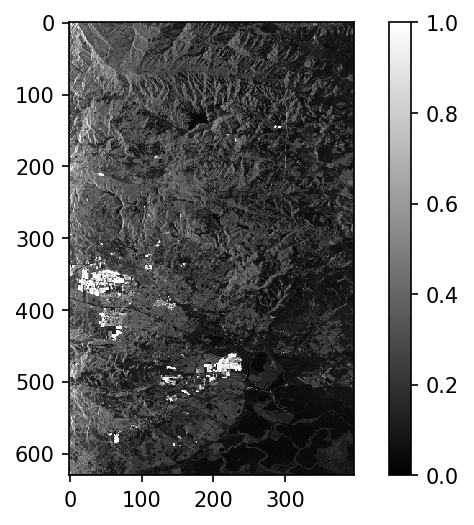

In [9]:
plt.imshow(smoothed_mag,cmap='gray',vmax=1);
plt.colorbar();